In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from rfpimp import *
import math 
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neural_network import MLPClassifier
import matplotlib.colors as mcolors

In [2]:
def sniff_modified(df):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['data type'] = df.dtypes
        info['percent missing'] = df.isnull().sum()*100/len(df)
        info['No. unique'] = df.apply(lambda x: len(x.unique()))
        info['unique values'] = df.apply(lambda x: x.unique())
        return info.sort_values('data type')

In [3]:
df_liver  = pd.read_csv("indian_liver_patient.csv")

In [4]:
df_liver.head().T

,0,1,2,3,4
Age,65,62,62,58,72
Gender,Female,Male,Male,Male,Male
Total_Bilirubin,0.7,10.9,7.3,1.0,3.9
Direct_Bilirubin,0.1,5.5,4.1,0.4,2.0
Alkaline_Phosphotase,187,699,490,182,195
Alamine_Aminotransferase,16,64,60,14,27
Aspartate_Aminotransferase,18,100,68,20,59
Total_Protiens,6.8,7.5,7.0,6.8,7.3
Albumin,3.3,3.2,3.3,3.4,2.4
Albumin_and_Globulin_Ratio,0.9,0.74,0.89,1.0,0.4


In [5]:
df_liver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
df_liver.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Dataset,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


In [7]:
df_liver.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [8]:
df_liver = df_liver.dropna()

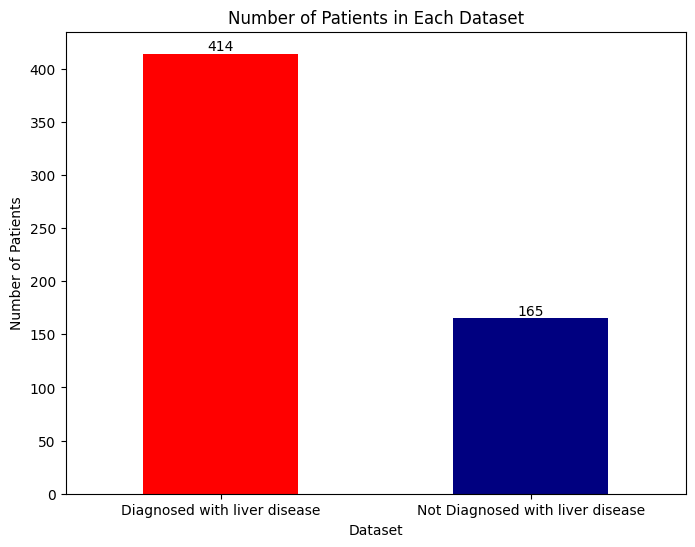

In [9]:
dataset_counts = df_liver['Dataset'].value_counts()

plt.figure(figsize=(8, 6))
bars = dataset_counts.plot(kind='bar', color=['red', 'navy'])

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f"{int(bar.get_height())}", ha='center', va='bottom')


plt.title('Number of Patients in Each Dataset')
plt.xlabel('Dataset')
plt.ylabel('Number of Patients')
plt.xticks([0, 1], ['Diagnosed with liver disease', 'Not Diagnosed with liver disease'], rotation=0)


plt.show()

In [10]:
correlation_matrix = df_liver.corr()

# Plotting correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Liver Dataset')
plt.show()

ValueError: could not convert string to float: 'Female'

In [ ]:
sniff_modified(df_liver)

In [ ]:
def get_risk_level(bilirubin):
    if bilirubin > 1.2:
        return 'High Risk'
    elif bilirubin > 0.8:
        return 'High Intermediate Risk'
    elif bilirubin > 0.6:
        return 'Low Intermediate Risk'
    else:
        return 'Low Risk'


df_liver['Risk_Level_Total_Bilirubin'] = df_liver['Total_Bilirubin'].apply(get_risk_level)

# Group by age and risk level and calculate the mean Total_Bilirubin values
age_risk_bilirubin_mean = df_liver.groupby(['Age', 'Risk_Level_Total_Bilirubin'])['Total_Bilirubin'].mean().unstack(fill_value=0)

# Plot the area chart
colors = {'High Risk': 'red', 'High Intermediate Risk': 'orange', 
          'Low Intermediate Risk': 'yellow', 'Low Risk': 'green'}

plt.figure(figsize=(12, 6))
age_risk_bilirubin_mean.plot.area(color=[colors[col] for col in age_risk_bilirubin_mean.columns])

# Customize the plot
plt.title('Total Bilirubin Risk Levels with Respect to Age')
plt.xlabel('Age')
plt.ylabel('Total Bilirubin')
plt.legend(title='Risk Level')

plt.tight_layout()
plt.show()

In [ ]:
def get_risk_level(bilirubin):
    if bilirubin > 1.2:
        return 'High Risk'
    elif bilirubin > 0.8:
        return 'High Intermediate Risk'
    elif bilirubin > 0.6:
        return 'Low Intermediate Risk'
    else:
        return 'Low Risk'


df_liver['Risk_Level_Total_Bilirubin'] = df_liver['Total_Bilirubin'].apply(get_risk_level)


age_risk_counts = df_liver.groupby(['Age', 'Risk_Level_Total_Bilirubin']).size().unstack(fill_value=0)


colors = {'High Risk': 'red', 'High Intermediate Risk': 'orange', 
          'Low Intermediate Risk': 'yellow', 'Low Risk': 'green'}

plt.figure(figsize=(12, 6))

for risk_level, color in colors.items():
    plt.plot(age_risk_counts.index, age_risk_counts[risk_level], label=risk_level, color=color)

# Fill the area below the lines with colors
plt.fill_between(age_risk_counts.index, age_risk_counts['Low Risk'], color='green', alpha=0.3)
plt.fill_between(age_risk_counts.index, age_risk_counts['Low Risk'], age_risk_counts['Low Intermediate Risk'], color='yellow', alpha=0.3)
plt.fill_between(age_risk_counts.index, age_risk_counts['Low Intermediate Risk'], age_risk_counts['High Intermediate Risk'], color='orange', alpha=0.3)
plt.fill_between(age_risk_counts.index, age_risk_counts['High Intermediate Risk'], age_risk_counts['High Risk'], color='red', alpha=0.3)


plt.title('Number of Patients with Different Total Bilirubin Risk Levels with Respect to Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.legend(title='Risk Level')

plt.tight_layout()
plt.show()

In [ ]:

def get_risk_level(direct_bilirubin):
    if direct_bilirubin > 0.3:
        return 'High Risk'
    elif direct_bilirubin > 0.2:
        return 'High Intermediate Risk'
    elif direct_bilirubin > 0.1:
        return 'Low Intermediate Risk'
    else:
        return 'Low Risk'

df_liver['Risk_Level_Direct_Bilirubin'] = df_liver['Direct_Bilirubin'].apply(get_risk_level)


age_risk_counts = df_liver.groupby(['Age', 'Risk_Level_Direct_Bilirubin']).size().unstack(fill_value=0)


colors = {'High Risk': 'red', 'High Intermediate Risk': 'orange', 
          'Low Intermediate Risk': 'yellow', 'Low Risk': 'green'}

plt.figure(figsize=(12, 6))

for risk_level, color in colors.items():
    plt.plot(age_risk_counts.index, age_risk_counts[risk_level], label=risk_level, color=color)

# Fill the area below the lines with colors
plt.fill_between(age_risk_counts.index, age_risk_counts['Low Risk'], color='green', alpha=0.3)
plt.fill_between(age_risk_counts.index, age_risk_counts['Low Risk'], age_risk_counts['Low Intermediate Risk'], color='yellow', alpha=0.3)
plt.fill_between(age_risk_counts.index, age_risk_counts['Low Intermediate Risk'], age_risk_counts['High Intermediate Risk'], color='orange', alpha=0.3)
plt.fill_between(age_risk_counts.index, age_risk_counts['High Intermediate Risk'], age_risk_counts['High Risk'], color='red', alpha=0.3)


plt.title('Number of Patients with Different Direct Bilirubin Risk Levels with Respect to Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.legend(title='Risk Level')

plt.tight_layout()
plt.show()

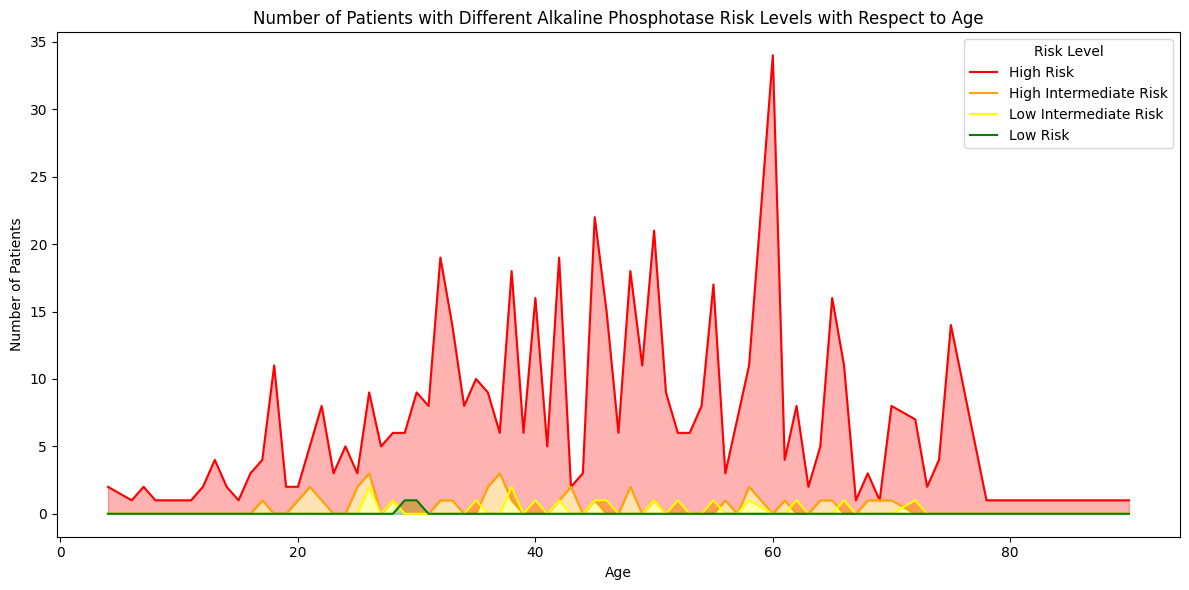

In [11]:

def get_risk_level(alkaline_phosphotase):
    if alkaline_phosphotase > 147:
        return 'High Risk'
    elif alkaline_phosphotase > 120:
        return 'High Intermediate Risk'
    elif alkaline_phosphotase > 80:
        return 'Low Intermediate Risk'
    else:
        return 'Low Risk'


df_liver['Risk_Level_Alkaline_Phosphotase'] = df_liver['Alkaline_Phosphotase'].apply(get_risk_level)


age_risk_counts = df_liver.groupby(['Age', 'Risk_Level_Alkaline_Phosphotase']).size().unstack(fill_value=0)


colors = {'High Risk': 'red', 'High Intermediate Risk': 'orange', 
          'Low Intermediate Risk': 'yellow', 'Low Risk': 'green'}

plt.figure(figsize=(12, 6))

for risk_level, color in colors.items():
    plt.plot(age_risk_counts.index, age_risk_counts[risk_level], label=risk_level, color=color)

# Fill the area below the lines with colors
plt.fill_between(age_risk_counts.index, age_risk_counts['Low Risk'], color='green', alpha=0.3)
plt.fill_between(age_risk_counts.index, age_risk_counts['Low Risk'], age_risk_counts['Low Intermediate Risk'], color='yellow', alpha=0.3)
plt.fill_between(age_risk_counts.index, age_risk_counts['Low Intermediate Risk'], age_risk_counts['High Intermediate Risk'], color='orange', alpha=0.3)
plt.fill_between(age_risk_counts.index, age_risk_counts['High Intermediate Risk'], age_risk_counts['High Risk'], color='red', alpha=0.3)


plt.title('Number of Patients with Different Alkaline Phosphotase Risk Levels with Respect to Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.legend(title='Risk Level')

plt.tight_layout()
plt.show()

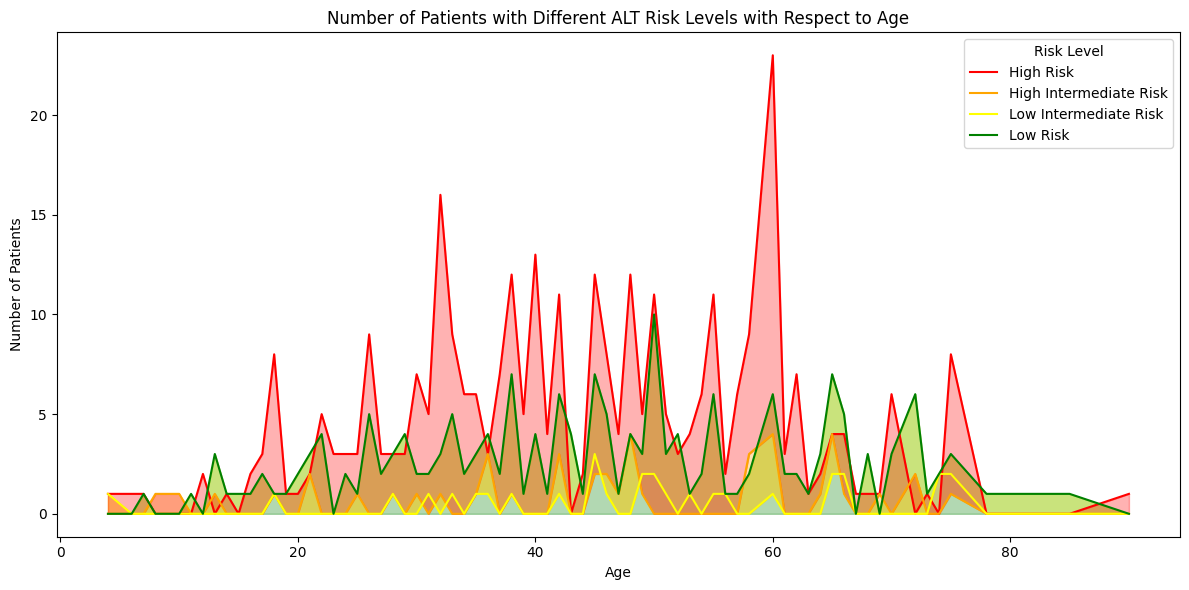

In [12]:
def get_risk_level(gender, alt):
    if gender == 'Male':
        if alt > 33:
            return 'High Risk'
        elif alt > 30:
            return 'High Intermediate Risk'
        elif alt > 29:
            return 'Low Intermediate Risk'
        else:
            return 'Low Risk'
    elif gender == 'Female':
        if alt > 25:
            return 'High Risk'
        elif alt > 22:
            return 'High Intermediate Risk'
        elif alt > 19:
            return 'Low Intermediate Risk'
        else:
            return 'Low Risk'
    else:
        return 'Unknown Gender'


df_liver['Risk_Level_ALT'] = df_liver.apply(lambda row: get_risk_level(row['Gender'], row['Alamine_Aminotransferase']), axis=1)


age_risk_counts = df_liver.groupby(['Age', 'Risk_Level_ALT']).size().unstack(fill_value=0)

# Plot the line chart
colors = {'High Risk': 'red', 'High Intermediate Risk': 'orange', 
          'Low Intermediate Risk': 'yellow', 'Low Risk': 'green'}

plt.figure(figsize=(12, 6))

for risk_level, color in colors.items():
    plt.plot(age_risk_counts.index, age_risk_counts[risk_level], label=risk_level, color=color)

# Fill the area below the lines with colors
plt.fill_between(age_risk_counts.index, age_risk_counts['Low Risk'], color='green', alpha=0.3)
plt.fill_between(age_risk_counts.index, age_risk_counts['Low Risk'], age_risk_counts['Low Intermediate Risk'], color='yellow', alpha=0.3)
plt.fill_between(age_risk_counts.index, age_risk_counts['Low Intermediate Risk'], age_risk_counts['High Intermediate Risk'], color='orange', alpha=0.3)
plt.fill_between(age_risk_counts.index, age_risk_counts['High Intermediate Risk'], age_risk_counts['High Risk'], color='red', alpha=0.3)


plt.title('Number of Patients with Different ALT Risk Levels with Respect to Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.legend(title='Risk Level')

plt.tight_layout()
plt.show()

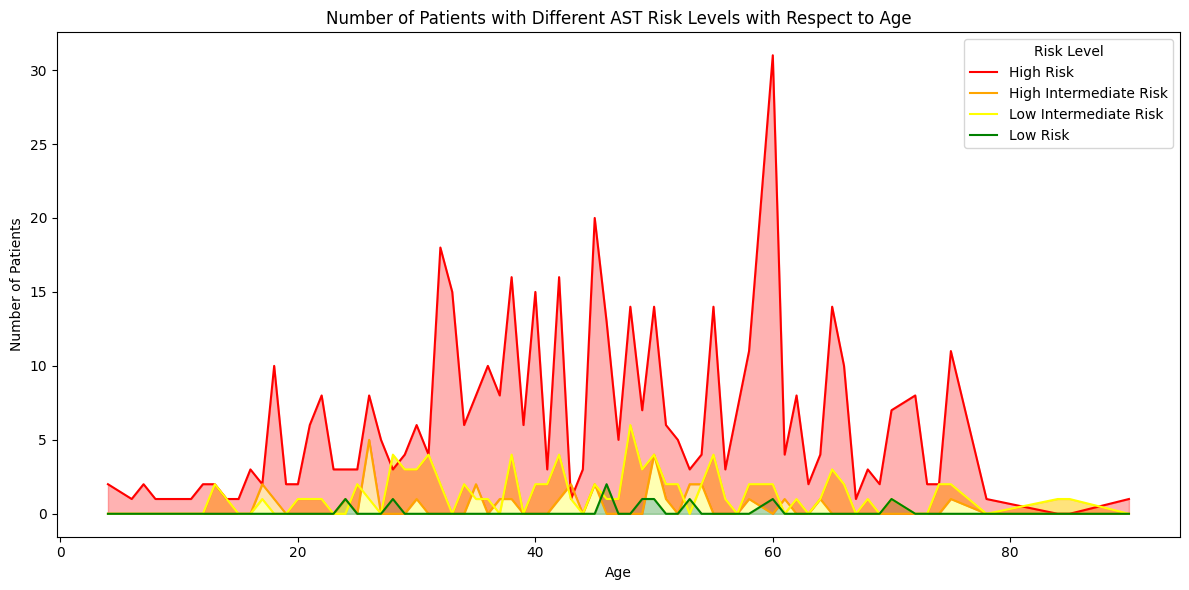

In [13]:
def get_risk_level(gender, ast):
    if gender == 'Male':
        if ast > 20:
            return 'High Risk'
        elif ast > 18:
            return 'High Intermediate Risk'
        elif ast > 14:
            return 'Low Intermediate Risk'
        else:
            return 'Low Risk'
    elif gender == 'Female':
        if ast > 36:
            return 'High Risk'
        elif ast > 30:
            return 'High Intermediate Risk'
        elif ast > 10:
            return 'Low Intermediate Risk'
        else:
            return 'Low Risk'
    else:
        return 'Unknown Gender'


df_liver['Risk_Level_AST'] = df_liver.apply(lambda row: get_risk_level(row['Gender'], row['Aspartate_Aminotransferase']), axis=1)


age_risk_counts = df_liver.groupby(['Age', 'Risk_Level_AST']).size().unstack(fill_value=0)


colors = {'High Risk': 'red', 'High Intermediate Risk': 'orange', 
          'Low Intermediate Risk': 'yellow', 'Low Risk': 'green'}

plt.figure(figsize=(12, 6))

for risk_level, color in colors.items():
    plt.plot(age_risk_counts.index, age_risk_counts[risk_level], label=risk_level, color=color)

# Fill the area below the lines with colors
plt.fill_between(age_risk_counts.index, age_risk_counts['Low Risk'], color='green', alpha=0.3)
plt.fill_between(age_risk_counts.index, age_risk_counts['Low Risk'], age_risk_counts['Low Intermediate Risk'], color='yellow', alpha=0.3)
plt.fill_between(age_risk_counts.index, age_risk_counts['Low Intermediate Risk'], age_risk_counts['High Intermediate Risk'], color='orange', alpha=0.3)
plt.fill_between(age_risk_counts.index, age_risk_counts['High Intermediate Risk'], age_risk_counts['High Risk'], color='red', alpha=0.3)


plt.title('Number of Patients with Different AST Risk Levels with Respect to Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.legend(title='Risk Level')

plt.tight_layout()
plt.show()

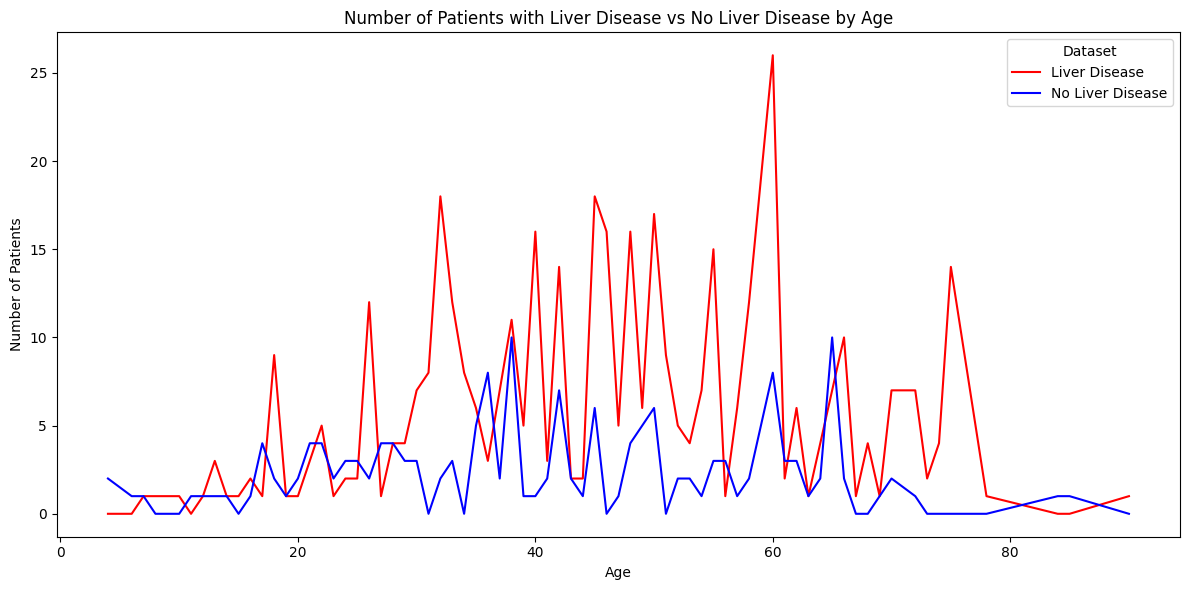

In [14]:
age_dataset_counts = df_liver.groupby(['Age', 'Dataset']).size().unstack(fill_value=0)


plt.figure(figsize=(12, 6))

plt.plot(age_dataset_counts.index, age_dataset_counts[1], label='Liver Disease', color='red')
plt.plot(age_dataset_counts.index, age_dataset_counts[2], label='No Liver Disease', color='blue')


plt.title('Number of Patients with Liver Disease vs No Liver Disease by Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.legend(title='Dataset')

plt.tight_layout()
plt.show()

#### Hypothesis Test

In [15]:
from scipy.stats import ttest_ind


# Extract age data for patients with liver disease and those without liver disease
age_liver_disease = df_liver[df_liver['Dataset'] == 1]['Age']
age_no_liver_disease = df_liver[df_liver['Dataset'] == 2]['Age']

# Perform t-test
t_statistic, p_value = ttest_ind(age_liver_disease, age_no_liver_disease)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean age between patients with liver disease and those without liver disease.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean age between patients with liver disease and those without liver disease.")


T-statistic: 3.2274424051688833
P-value: 0.0013198543076094872
Reject the null hypothesis: There is a significant difference in the mean age between patients with liver disease and those without liver disease.


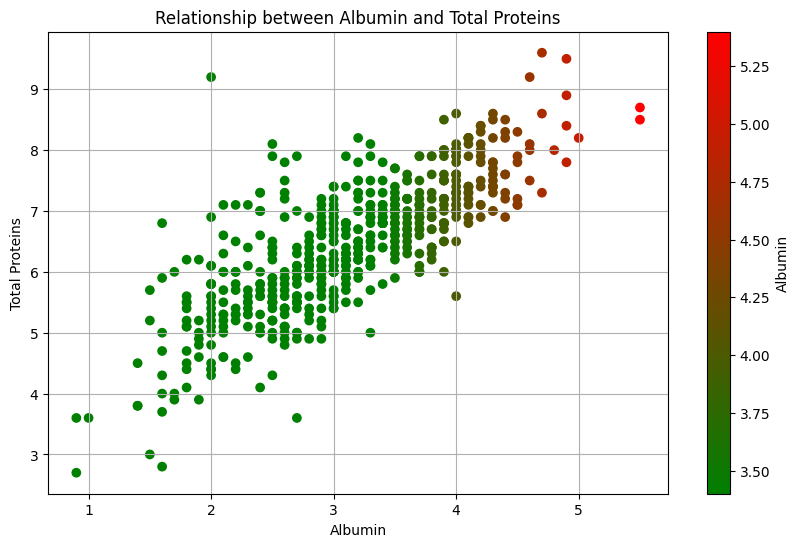

In [16]:
albumin = df_liver['Albumin']
total_proteins = df_liver['Total_Protiens']

# Define threshold range for Albumin
lower_threshold = 3.4
upper_threshold = 5.4

# Define custom colormap from green to red
cmap = mcolors.LinearSegmentedColormap.from_list("custom", [(0, "green"), (1, "red")])

# Normalize Albumin values to range [0, 1]
norm = mcolors.Normalize(vmin=lower_threshold, vmax=upper_threshold)

# Create scatter plot with custom colormap
plt.figure(figsize=(10, 6))
plt.scatter(albumin, total_proteins, c=albumin, cmap=cmap, norm=norm)
plt.colorbar(label='Albumin')
plt.xlabel('Albumin')
plt.ylabel('Total Proteins')
plt.title('Relationship between Albumin and Total Proteins')
plt.grid(True)
plt.show()

In [19]:
df_liver.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset',
       'Risk_Level_Alkaline_Phosphotase', 'Risk_Level_ALT', 'Risk_Level_AST'],
      dtype='object')

In [21]:
df_liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Risk_Level_Alkaline_Phosphotase,Risk_Level_ALT,Risk_Level_AST
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,High Risk,Low Risk,Low Intermediate Risk
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,High Risk,High Risk,High Risk
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,High Risk,High Risk,High Risk
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,High Risk,Low Risk,High Intermediate Risk
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,High Risk,Low Risk,High Risk


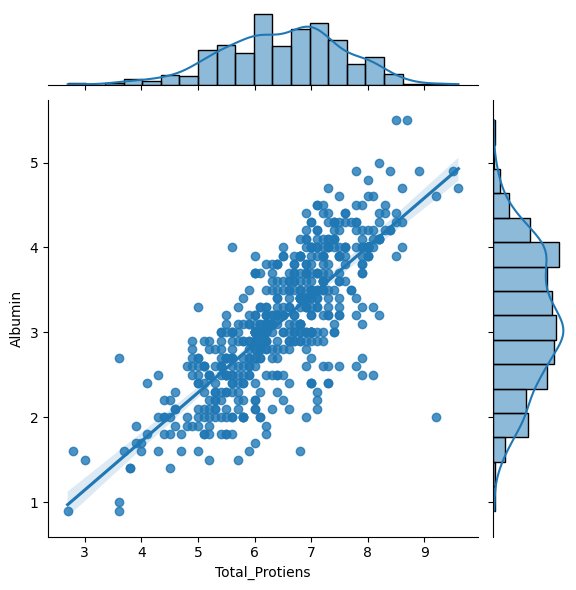

In [22]:
sns.jointplot(x="Total_Protiens", y="Albumin", data=df_liver, kind="reg")

In [23]:
x = df_liver.drop(columns=['Dataset'])
y = df_liver['Dataset']

In [24]:
x.head().T

,0,1,2,3,4
Age,65,62,62,58,72
Gender,Female,Male,Male,Male,Male
Total_Bilirubin,0.7,10.9,7.3,1.0,3.9
Direct_Bilirubin,0.1,5.5,4.1,0.4,2.0
Alkaline_Phosphotase,187,699,490,182,195
Alamine_Aminotransferase,16,64,60,14,27
Aspartate_Aminotransferase,18,100,68,20,59
Total_Protiens,6.8,7.5,7.0,6.8,7.3
Albumin,3.3,3.2,3.3,3.4,2.4
Albumin_and_Globulin_Ratio,0.9,0.74,0.89,1.0,0.4


In [26]:
y.head().T

0    1
1    1
2    1
3    1
4    1
Name: Dataset, dtype: int64

In [27]:
encoder = ce.OrdinalEncoder(mapping=[{'col':'Gender', 'mapping':{'Female':1,'Male':2}}])
encoder.fit(x["Gender"])
x["Gender"] = encoder.transform(x["Gender"])
x.head().T

,0,1,2,3,4
Age,65,62,62,58,72
Gender,1,2,2,2,2
Total_Bilirubin,0.7,10.9,7.3,1.0,3.9
Direct_Bilirubin,0.1,5.5,4.1,0.4,2.0
Alkaline_Phosphotase,187,699,490,182,195
Alamine_Aminotransferase,16,64,60,14,27
Aspartate_Aminotransferase,18,100,68,20,59
Total_Protiens,6.8,7.5,7.0,6.8,7.3
Albumin,3.3,3.2,3.3,3.4,2.4
Albumin_and_Globulin_Ratio,0.9,0.74,0.89,1.0,0.4


In [33]:
df_liver['Risk_Level_Alkaline_Phosphotase'].unique()

array(['High Risk', 'High Intermediate Risk', 'Low Risk',
       'Low Intermediate Risk'], dtype=object)

In [28]:
def showimp(rf,X,y):
    feature = list(X.columns)
    I = importances(rf,X,y,features=feature)
    plot_importances(I,color='#4575b4')

In [29]:
def evaluate(X,y):
    oob_score = []
    n = []
    h = []
    for i in range(10):
        rf = RandomForestRegressor(n_estimators=100,n_jobs=-1,oob_score=True)
        rf.fit(X,y)
        oob_score.append(round(rf.oob_score_,5))
        n.append(rfnnodes(rf))
        h.append(np.median(rfmaxdepths(rf)))
        #print(round(rf.score(X,y),6))
        print(f'OOB R^2 is {oob_score[i]:.5f} using {n[i]:d} tree nodes with {h[i]} median tree depth')
    print("--------------------------------------------------------------------------------------")
    print(f'Average of OOB R^2 is {np.mean(oob_score):.5f} using average {math.trunc(round(np.mean(n),0))} tree nodes with average {round(np.mean(h),2)} median tree depth')
    return rf, np.mean(oob_score)

In [38]:
encoder = ce.OrdinalEncoder(mapping=[{'col':'Risk_Level_Alkaline_Phosphotase', 'mapping':{'High Risk':1,'High Intermediate Risk':2,
                                                                                         'Low Risk':3, 'Low Intermediate Risk':4}}])
encoder.fit(x["Risk_Level_Alkaline_Phosphotase"])
x["Risk_Level_Alkaline_Phosphotase"] = encoder.transform(x["Risk_Level_Alkaline_Phosphotase"])
x.head().T

C:\Users\shaik\anaconda3\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)


,0,1,2,3,4
Age,65,62,62,58,72
Gender,1,2,2,2,2
Total_Bilirubin,0.7,10.9,7.3,1.0,3.9
Direct_Bilirubin,0.1,5.5,4.1,0.4,2.0
Alkaline_Phosphotase,187,699,490,182,195
Alamine_Aminotransferase,16,64,60,14,27
Aspartate_Aminotransferase,18,100,68,20,59
Total_Protiens,6.8,7.5,7.0,6.8,7.3
Albumin,3.3,3.2,3.3,3.4,2.4
Albumin_and_Globulin_Ratio,0.9,0.74,0.89,1.0,0.4


In [43]:
df_liver['Risk_Level_ALT'].unique()

array(['Low Risk', 'High Risk', 'High Intermediate Risk',
       'Low Intermediate Risk'], dtype=object)

In [44]:
encoder = ce.OrdinalEncoder(mapping=[{'col':'Risk_Level_ALT', 'mapping':{'High Risk':1,'High Intermediate Risk':2,
                                                                                         'Low Risk':3, 'Low Intermediate Risk':4}}])
encoder.fit(x["Risk_Level_ALT"])
x["Risk_Level_ALT"] = encoder.transform(x["Risk_Level_ALT"])
x.head().T

,0,1,2,3,4
Age,65,62,62,58,72
Gender,1,2,2,2,2
Total_Bilirubin,0.7,10.9,7.3,1.0,3.9
Direct_Bilirubin,0.1,5.5,4.1,0.4,2.0
Alkaline_Phosphotase,187,699,490,182,195
Alamine_Aminotransferase,16,64,60,14,27
Aspartate_Aminotransferase,18,100,68,20,59
Total_Protiens,6.8,7.5,7.0,6.8,7.3
Albumin,3.3,3.2,3.3,3.4,2.4
Albumin_and_Globulin_Ratio,0.9,0.74,0.89,1.0,0.4


In [45]:
encoder = ce.OrdinalEncoder(mapping=[{'col':'Risk_Level_AST', 'mapping':{'High Risk':1,'High Intermediate Risk':2,
                                                                                         'Low Risk':3, 'Low Intermediate Risk':4}}])
encoder.fit(x["Risk_Level_AST"])
x["Risk_Level_AST"] = encoder.transform(x["Risk_Level_AST"])
x.head().T

,0,1,2,3,4
Age,65.0,62.00,62.00,58.0,72.0
Gender,1.0,2.00,2.00,2.0,2.0
Total_Bilirubin,0.7,10.90,7.30,1.0,3.9
Direct_Bilirubin,0.1,5.50,4.10,0.4,2.0
Alkaline_Phosphotase,187.0,699.00,490.00,182.0,195.0
Alamine_Aminotransferase,16.0,64.00,60.00,14.0,27.0
Aspartate_Aminotransferase,18.0,100.00,68.00,20.0,59.0
Total_Protiens,6.8,7.50,7.00,6.8,7.3
Albumin,3.3,3.20,3.30,3.4,2.4
Albumin_and_Globulin_Ratio,0.9,0.74,0.89,1.0,0.4


In [55]:
x

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Risk_Level_Alkaline_Phosphotase,Risk_Level_ALT,Risk_Level_AST
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1,3,4
1,62,2,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1,1
2,62,2,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1,1
3,58,2,1.0,0.4,182,14,20,6.8,3.4,1.00,1,3,2
4,72,2,3.9,2.0,195,27,59,7.3,2.4,0.40,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,60,2,0.5,0.1,500,20,34,5.9,1.6,0.37,1,3,1
579,40,2,0.6,0.1,98,35,31,6.0,3.2,1.10,4,1,1
580,52,2,0.8,0.2,245,48,49,6.4,3.2,1.00,1,1,1
581,31,2,1.3,0.5,184,29,32,6.8,3.4,1.00,1,3,1


In [56]:
# Assuming df is your DataFrame containing the columns you want to convert
columns_to_convert = ['Risk_Level_Alkaline_Phosphotase', 'Risk_Level_ALT', 'Risk_Level_AST']  # List of column names to convert

# Convert columns to float
x[columns_to_convert] = x[columns_to_convert].astype(float)

In [57]:
x.sample(15)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Risk_Level_Alkaline_Phosphotase,Risk_Level_ALT,Risk_Level_AST
280,58,2,0.8,0.2,123,56,48,6.0,3.0,1.0,2.0,1.0,1.0
399,27,2,1.0,0.2,205,137,145,6.0,3.0,1.0,1.0,1.0,1.0
29,84,1,0.7,0.2,188,13,21,6.0,3.2,1.1,1.0,3.0,4.0
169,60,2,8.9,4.0,950,33,32,6.8,3.1,0.8,1.0,2.0,1.0
354,48,1,0.8,0.2,150,25,23,7.5,3.9,1.0,1.0,2.0,4.0
377,20,1,0.6,0.2,202,12,13,6.1,3.0,0.9,1.0,3.0,4.0
413,48,2,0.7,0.2,208,15,30,4.6,2.1,0.8,1.0,3.0,1.0
356,33,2,0.7,0.2,256,21,30,8.5,3.9,0.8,1.0,3.0,1.0
3,58,2,1.0,0.4,182,14,20,6.8,3.4,1.0,1.0,3.0,2.0
365,40,2,0.7,0.2,176,28,43,5.3,2.4,0.8,1.0,3.0,1.0


In [59]:
rf_baseline,oob_score_baseline = evaluate(x,y)

OOB R^2 is 0.07709 using 15260 tree nodes with 16.0 median tree depth
OOB R^2 is 0.10538 using 15248 tree nodes with 16.0 median tree depth
OOB R^2 is 0.08289 using 15342 tree nodes with 16.0 median tree depth
OOB R^2 is 0.10387 using 15228 tree nodes with 15.0 median tree depth
OOB R^2 is 0.07215 using 15258 tree nodes with 15.0 median tree depth
OOB R^2 is 0.07831 using 15312 tree nodes with 16.0 median tree depth
OOB R^2 is 0.10294 using 15292 tree nodes with 16.0 median tree depth
OOB R^2 is 0.11037 using 15290 tree nodes with 16.0 median tree depth
OOB R^2 is 0.07936 using 15318 tree nodes with 16.0 median tree depth
OOB R^2 is 0.10146 using 15292 tree nodes with 16.0 median tree depth
--------------------------------------------------------------------------------------
Average of OOB R^2 is 0.09138 using average 15284 tree nodes with average 15.8 median tree depth


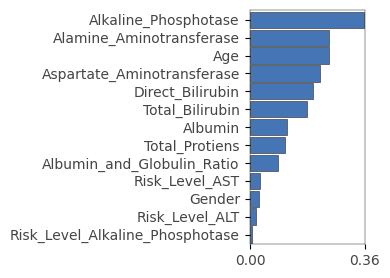

In [60]:
showimp(rf_baseline,x,y)

In [61]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [62]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
validation_predictions = lr.predict(X_test)
validation_e = accuracy_score(y_test,validation_predictions)
print(f"{validation_e*100:.2f}% correct")

65.52% correct


C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
lr.predict_proba(X_test)

array([[4.91049964e-01, 5.08950036e-01],
       [6.29217279e-01, 3.70782721e-01],
       [5.30269673e-01, 4.69730327e-01],
       [4.75631819e-01, 5.24368181e-01],
       [9.25078469e-01, 7.49215308e-02],
       [8.10852642e-01, 1.89147358e-01],
       [9.11405094e-01, 8.85949060e-02],
       [4.86570517e-01, 5.13429483e-01],
       [5.19732700e-01, 4.80267300e-01],
       [6.93597360e-01, 3.06402640e-01],
       [5.25827871e-01, 4.74172129e-01],
       [5.88992459e-01, 4.11007541e-01],
       [6.90109919e-01, 3.09890081e-01],
       [5.11043152e-01, 4.88956848e-01],
       [8.58440296e-01, 1.41559704e-01],
       [3.79113729e-01, 6.20886271e-01],
       [5.01865195e-01, 4.98134805e-01],
       [4.62946737e-01, 5.37053263e-01],
       [8.77128610e-01, 1.22871390e-01],
       [6.19814877e-01, 3.80185123e-01],
       [6.97015515e-01, 3.02984485e-01],
       [6.68304605e-01, 3.31695395e-01],
       [7.62149120e-01, 2.37850880e-01],
       [6.25421920e-01, 3.74578080e-01],
       [6.997813

In [64]:
y_test.tail()

3      1
266    1
49     1
344    2
258    2
Name: Dataset, dtype: int64

In [65]:
pred_df = pd.DataFrame(lr.predict_proba(X_test),columns = ['Prob of Liver Disease', 'Prob of no Liver Disease'])
pred_df['Prediction'] = validation_predictions # or lr.predict(X_test)

In [66]:
pred_df.tail()

,Prob of Liver Disease,Prob of no Liver Disease,Prediction
111,0.530892,0.469108,1
112,0.681941,0.318059,1
113,0.998291,0.001709,1
114,0.593447,0.406553,1
115,0.501373,0.498627,1


In [67]:
pred_df.Prediction = pred_df.Prediction.replace({1:"Liver Disease",2:"No Liver Disease"})

In [68]:
pred_df

,Prob of Liver Disease,Prob of no Liver Disease,Prediction
0,0.491050,0.508950,No Liver Disease
1,0.629217,0.370783,Liver Disease
2,0.530270,0.469730,Liver Disease
3,0.475632,0.524368,No Liver Disease
4,0.925078,0.074922,Liver Disease
...,...,...,...
111,0.530892,0.469108,Liver Disease
112,0.681941,0.318059,Liver Disease
113,0.998291,0.001709,Liver Disease
114,0.593447,0.406553,Liver Disease


In [69]:
print(confusion_matrix(y_test,validation_predictions))

[[68 16]
 [24  8]]


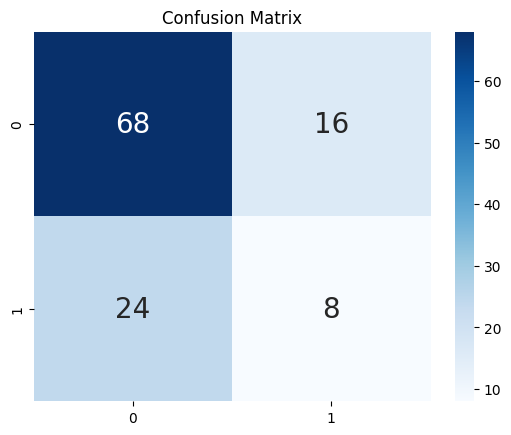

In [70]:
ax = plt.axes()
df_cm = confusion_matrix(y_test,validation_predictions)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 20}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [72]:
def show_test():
    ep1 = [0,100,200,300,400,500,600,700,800,900,1000,1500,2000]
    h_5 = [0,60,70,70,83.3,93.3,96.7,86.7,86.7,76.7,73.3,66.7,66.7]
    h_4 = [0,40,70,63.3,66.7,70,70,70,70,66.7,66.7,43.3,33.3]
    h_3 = [0,46.7,76.7,80,76.7,76.7,76.6,73.3,73.3,73.3,73.3,76.7,76.7]
    plt.figure(figsize=(10,4))
    l1, = plt.plot(ep1, h_3, "--",color='b',label="node-3", marker=11)
    l2, = plt.plot(ep1, h_4, "--",color='g',label="node-4", marker=8)
    l3, = plt.plot(ep1, h_5, "--",color='r',label="node-5", marker=5)
    plt.legend(handles=[l1,l2,l3], loc=1)
    plt.xlabel("number of Epochs")
    plt.ylabel("% Hits")
    plt.title("Number of Hidden Layers - Performance")
    
    ep2 = [0,100,200,300,400,500,600,700]
    tanh = [0.18,0.027,0.025,0.022,0.0068,0.0060,0.0057,0.00561]
    sigm = [0.185,0.0897,0.060,0.0396,0.0343,0.0314,0.0296,0.0281]
    Relu = [0.185,0.05141,0.05130,0.05127,0.05124,0.05123,0.05122,0.05121]
    plt.figure(figsize=(10,4))
    l1 , = plt.plot(ep2, tanh, "--",color='b',label="Hyperbolic Tangent",marker=11)
    l2 , = plt.plot(ep2, sigm, "--",color='g',label="Sigmoide", marker=8)
    l3 , = plt.plot(ep2, Relu, "--",color='r',label="ReLu", marker=5)
    plt.legend(handles=[l1,l2,l3], loc=1)
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.title("Activation Functions - Performance")
    
    fig, ax = plt.subplots()
    names = ["Hyperbolic Tangent","Sigmoide","ReLU"]
    x1 = [2.0,4.0,6.0]
    plt.bar(x1[0], 53.4,0.4,color='b')
    plt.bar(x1[1], 96.7,0.4,color='g')
    plt.bar(x1[2], 33.2,0.4,color='r')
    plt.xticks(x1,names)
    plt.ylabel('% Hits')
    plt.title('Hits - Activation Functions')
    plt.show()

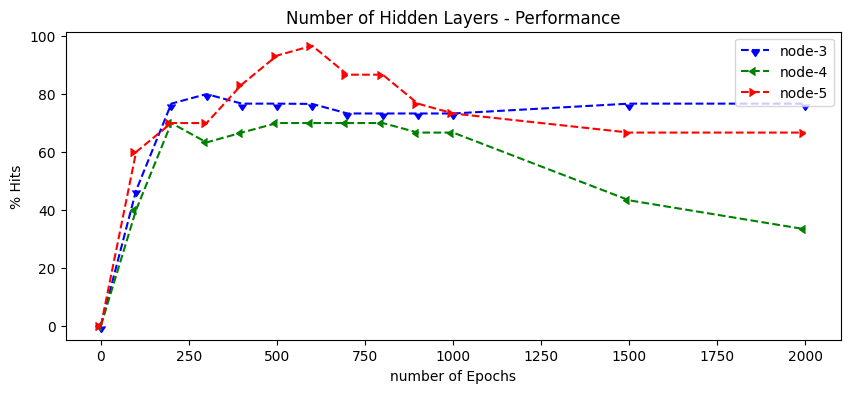

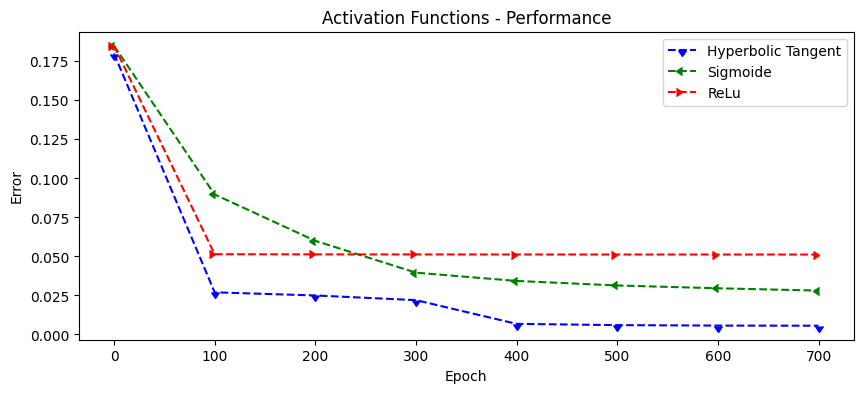

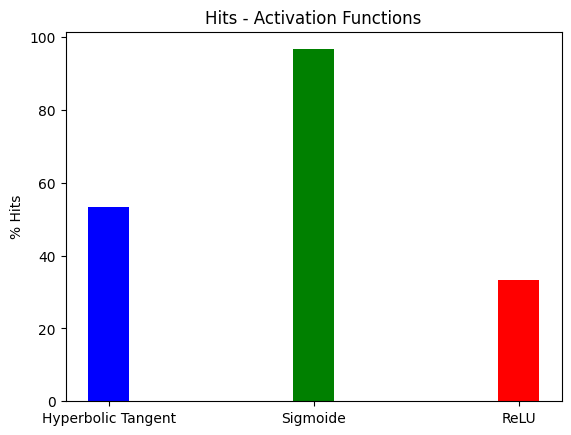

In [73]:
show_test()

In [74]:
activation_functions = ['identity', 'logistic', 'tanh', 'relu']

accuracy_scores = []
f1_scores = []
history = {}

In [75]:
for activation in activation_functions:
    mlp = MLPClassifier(hidden_layer_sizes=(100,), activation=activation, max_iter=60, random_state=42)
    mlp.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = mlp.predict(X_test)
    
    # Calculate accuracy and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    
    # Store training history
    history[activation] = mlp.loss_curve_

C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(


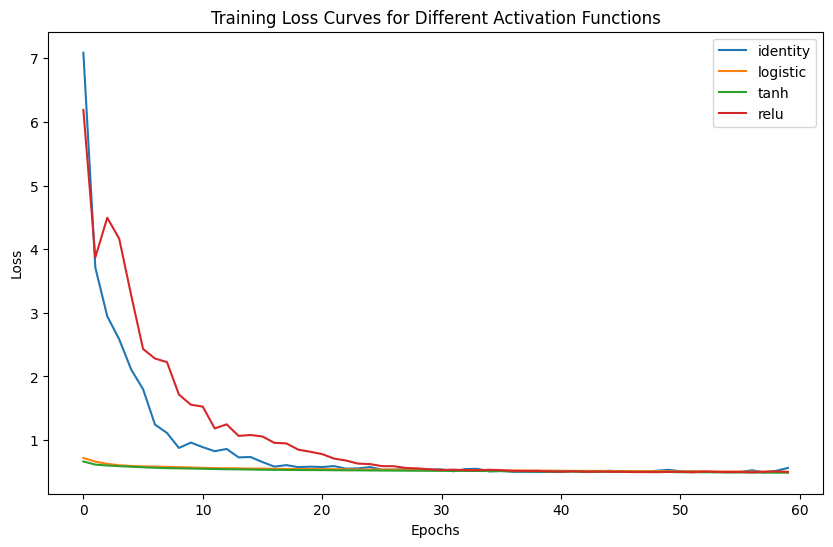

In [76]:
plt.figure(figsize=(10, 6))
for activation, loss_curve in history.items():
    plt.plot(loss_curve, label=activation)
plt.title('Training Loss Curves for Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [77]:
print("Activation Function\tAccuracy\tF1-Score")
for i in range(len(activation_functions)):
    print(f"{activation_functions[i]}\t\t\t{accuracy_scores[i]:.4f}\t\t{f1_scores[i]:.4f}")

Activation Function	Accuracy	F1-Score
identity			0.6466		0.7172
logistic			0.7069		0.8265
tanh			0.7069		0.8247
relu			0.7069		0.8247


In [79]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

In [80]:
mlp = MLPClassifier(max_iter=60)

grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


# Get the best parameters and best accuracy score
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilaye

C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilaye

C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilaye

C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilaye

C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilaye

C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilaye

C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilaye

C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilaye

C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilaye

C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilaye

C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilaye

C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilaye

In [81]:
# Train the MLP model with the best parameters
best_mlp = MLPClassifier(**best_params, max_iter=60, random_state=42)
best_mlp.fit(X_train, y_train)

# Predict on the test set
y_pred = best_mlp.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)
print("Test Accuracy:", accuracy)

Best Parameters: {'activation': 'identity', 'alpha': 0.01, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001}
Best Accuracy: 0.725479195885928
Test Accuracy: 0.7241379310344828


C:\Users\shaik\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(


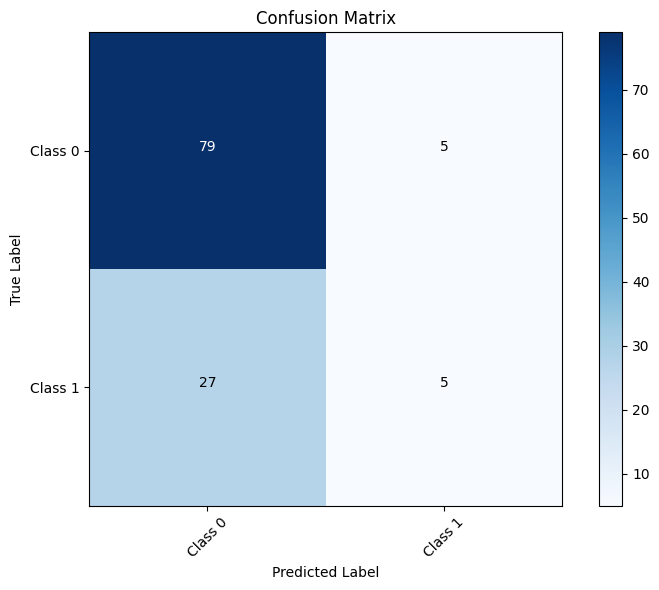

In [82]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Class 0', 'Class 1']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2. else "black")

plt.tight_layout()
plt.show()

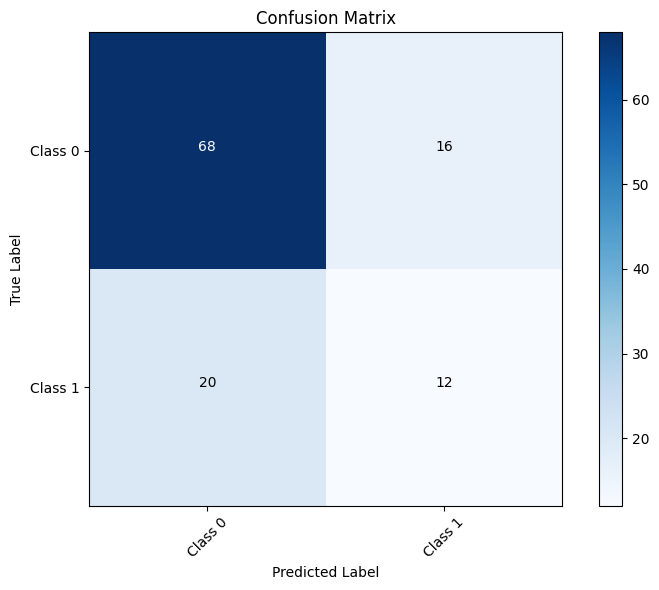

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Test Accuracy: 0.6896551724137931


In [83]:
from sklearn.ensemble import RandomForestClassifier


# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best accuracy score
best_params = grid_search.best_params_

# Train the RandomForest model with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Class 0', 'Class 1']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2. else "black")

plt.tight_layout()
plt.show()

print("Best Parameters:", best_params)
print("Test Accuracy:", accuracy)


In [84]:
!pip install pycaret

  Obtaining dependency information for pandas<2.2.0 from https://files.pythonhosted.org/packages/11/17/fb1a34f3e73debbc2fd15a01ea17eaab3717943d08463ff4979a4f024b3f/pandas-2.1.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for matplotlib<3.8.0 from https://files.pythonhosted.org/packages/e3/b1/1b6c34b89173d6c206dc5a4028e8518b4dfee3569c13bdc0c88d0486cae7/matplotlib-3.7.5-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for numpy<1.27,>=1.21 from https://files.pythonhosted.org/packages/d8/ec/ebef2f7d7c28503f958f0f8b992e7ce606fb74f9e891199329d5f5f87404/numpy-1.24.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
    --------------------------------------- 0.1/7.5 MB 6.4 MB/s eta 0:00:02
    --------------------------------------- 0.1/7.5 MB 6.4 MB/s eta 0:00:02
   - -------------------------------------- 0.3/7.5 MB 2.5 MB/s eta 0:00:03
   -- ------------------------------------- 0.4/7.5 MB

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\shaik\\anaconda3\\Lib\\site-packages\\~umpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



In [85]:
# Import necessary libraries
import pandas as pd
from pycaret.classification import *

In [86]:
from pycaret.classification import setup, compare_models, predict_model, plot_model

In [87]:
!pip install mlflow

  Obtaining dependency information for pytz<2024 from https://files.pythonhosted.org/packages/3b/dd/9b84302ba85ac6d3d3042d3e8698374838bde1c386b4adb1223d7a0efd4e/pytz-2023.4-py2.py3-none-any.whl.metadata
  Obtaining dependency information for packaging<24 from https://files.pythonhosted.org/packages/ec/1a/610693ac4ee14fcdf2d9bf3c493370e4f2ef7ae2e19217d7a237ff42367d/packaging-23.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/53.0 kB ? eta -:--:--
   ---------------------------------------- 53.0/53.0 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/506.5 kB ? eta -:--:--
   --------------------------------------  501.8/506.5 kB 10.5 MB/s eta 0:00:01
   --------------------------------------- 506.5/506.5 kB 10.6 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2024.1
    Uninstalling pytz-2024.1:
      Successfully uninstalled pytz-2024.1
  Attempting uninstall: packaging
    Found existing installation:

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.75 requires python-dateutil==2.8.2, but you have python-dateutil 2.9.0.post0 which is incompatible.
conda-repo-cli 1.0.75 requires PyYAML==6.0.1, but you have pyyaml 6.0 which is incompatible.
pycaret 3.3.0 requires matplotlib<3.8.0, but you have matplotlib 3.8.3 which is incompatible.
pycaret 3.3.0 requires pandas<2.2.0, but you have pandas 2.2.1 which is incompatible.
python-lsp-black 1.2.1 requires black>=22.3.0, but you have black 0.0 which is incompatible.
sktime 0.26.1 requires pandas<2.2.0,>=1.1, but you have pandas 2.2.1 which is incompatible.


In [89]:
x.head(5).T

,0,1,2,3,4
Age,65.0,62.00,62.00,58.0,72.0
Gender,1.0,2.00,2.00,2.0,2.0
Total_Bilirubin,0.7,10.90,7.30,1.0,3.9
Direct_Bilirubin,0.1,5.50,4.10,0.4,2.0
Alkaline_Phosphotase,187.0,699.00,490.00,182.0,195.0
Alamine_Aminotransferase,16.0,64.00,60.00,14.0,27.0
Aspartate_Aminotransferase,18.0,100.00,68.00,20.0,59.0
Total_Protiens,6.8,7.50,7.00,6.8,7.3
Albumin,3.3,3.20,3.30,3.4,2.4
Albumin_and_Globulin_Ratio,0.9,0.74,0.89,1.0,0.4


In [90]:
setup(x, target=y, session_id=123)

,Description,Value
0,Session id,123
1,Target,Dataset
2,Target type,Binary
3,Target mapping,"1: 0, 2: 1"
4,Original data shape,"(579, 14)"
5,Transformed data shape,"(579, 14)"
6,Transformed train set shape,"(405, 14)"
7,Transformed test set shape,"(174, 14)"
8,Numeric features,13
9,Preprocess,True


In [92]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7162,0.0000,0.7162,0.6949,0.6862,0.1956,0.2207,0.1350
dummy,Dummy Classifier,0.7162,0.0000,0.7162,0.5130,0.5977,0.0000,0.0000,0.0150
lightgbm,Light Gradient Boosting Machine,0.7134,0.0000,0.7134,0.7128,0.7028,0.2575,0.2734,0.4270
ada,Ada Boost Classifier,0.7113,0.0000,0.7113,0.6974,0.7002,0.2470,0.2515,0.0770
knn,K Neighbors Classifier,0.7086,0.0000,0.7086,0.6971,0.6965,0.2374,0.2454,1.8010
lr,Logistic Regression,0.7038,0.0000,0.7038,0.6468,0.6520,0.1032,0.1166,0.7680
ridge,Ridge Classifier,0.7013,0.0000,0.7013,0.6348,0.6324,0.0552,0.0722,0.0150
lda,Linear Discriminant Analysis,0.6989,0.0000,0.6989,0.6462,0.6386,0.0701,0.0919,0.0240
et,Extra Trees Classifier,0.6940,0.0000,0.6940,0.6648,0.6650,0.1437,0.1588,0.1100
gbc,Gradient Boosting Classifier,0.6890,0.0000,0.6890,0.6605,0.6668,0.1505,0.1573,0.1150


In [93]:
# Evaluate best model
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

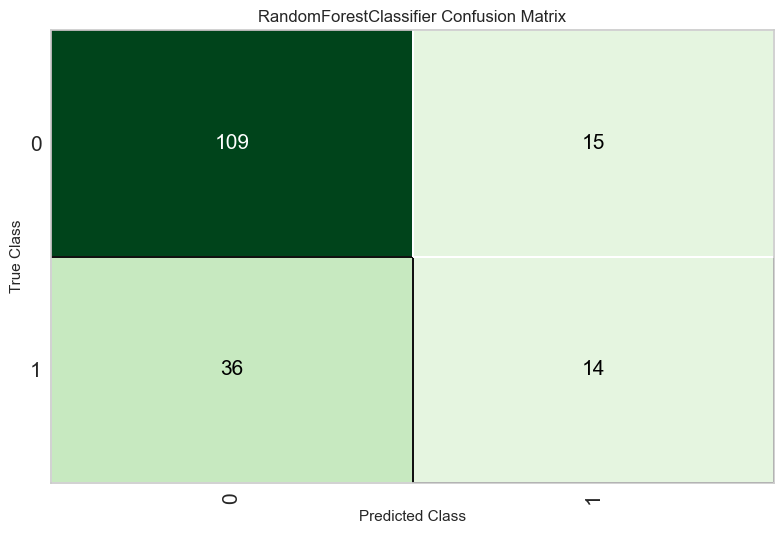

In [94]:
plot_model(best_model, plot='confusion_matrix')